In [15]:
import eos
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
import pandas as pd

In [16]:
#obs=eos.Observable.make('B->Dlnu::R_D',eos.Parameters(),eos.Kinematics(q2_tau_max=11.662,q2_tau_min=3.15773,q2_mu_max=11.662,q2_mu_min=0.01),eos.Options())
#display(obs)

In [17]:
#obs=eos.Observable.make('B->D^*lnu::R_D^*',eos.Parameters(),eos.Kinematics(q2_tau_max=11.662,q2_tau_min=3.15773,q2_mu_max=11.662,q2_mu_min=0.01),eos.Options())
#display(obs)

In [18]:
#obs=eos.Observable.make('B->Dlnu::BR',eos.Parameters(),eos.Kinematics(q2_max=11.662,q2_min=0.00),eos.Options())
#display(obs)

In [19]:
#obs=eos.Observable.make('B->D^*lnu::BR',eos.Parameters(),eos.Kinematics(q2_max=11.662,q2_min=3.15773),eos.Options())
#display(obs)

In [50]:


analysis_args = {
    'global_options': {
        'model':           'WilsonScan',
        'form-factors':    'BSZ2015',
        'z-order-bound':   '2',
        'z-order-lp':      '3',
        'z-order-slp':     '2',
        'z-order-sslp':    '1',
        'SU3F-limit-sslp': '1',
    },
    'likelihood': [
        ## Theory
        # B-LCSR
        'B->D^(*)::FormFactors[f_+,f_0,A_0,A_1,A_2,V,T_1,T_2,T_23]@GKvD2018',
        # Lattice B->D
        'B->D::f_++f_0@FNALMILC2015A',
        'B->D::f_++f_0@HPQCD2015A',
        # Lattice B->D^*
        'B->D^*::A_1[s_max]@HFLAV-2019',
        # bounds
        'b->c::Bound[0^+]@CLN',
        'b->c::Bound[0^-]@CLN',
        'b->c::Bound[1^+]@CLN',
        'b->c::Bound[1^-]@CLN',
        ## Experiment
        #'B^0->(Dpi)^+l^-nubar::KinematicDistributionsAngularObservables@BBGJvD:2021A',
    ],
    'manual_constraints': {
        # QCDSR
        "B(*)->D(*)::chi_2(1)": {
            'type': 'Gaussian',
            'observable': "B(*)->D(*)::chi_2(1)@HQET",
            'kinematics': { },
            'options':    {
                'form-factors':    'HQET',
                'z-order-bound':   '2',
                'z-order-lp':      '3',
                'z-order-slp':     '2',
                'z-order-sslp':    '1',
                'SU3F-limit-sslp': '1',
            },
            'mean':       -0.06,
            'sigma-stat': { 'hi': 0.02, 'lo': 0.02 },
            'sigma-sys':  { 'hi': 0.00, 'lo': 0.00 },
            'dof': 1
        },
        "B(*)->D(*)::chi_2'(1)": {
            'type': 'Gaussian',
            'observable': "B(*)->D(*)::chi_2'(1)@HQET",
            'kinematics': { },
            'options':    {
                'form-factors':    'HQET',
                'z-order-bound':   '2',
                'z-order-lp':      '3',
                'z-order-slp':     '2',
                'z-order-sslp':    '1',
                'SU3F-limit-sslp': '1',
            },
            'mean':       +0.00,
            'sigma-stat': { 'hi': 0.02, 'lo': 0.02 },
            'sigma-sys':  { 'hi': 0.00, 'lo': 0.00 },
            'dof': 1
        },
        "B(*)->D(*)::chi_3'(1)": {
            'type': 'Gaussian',
            'observable': "B(*)->D(*)::chi_3'(1)@HQET",
            'kinematics': { },
            'options':    {
                'form-factors':    'HQET',
                'z-order-bound':   '2',
                'z-order-lp':      '3',
                'z-order-slp':     '2',
                'z-order-sslp':    '1',
                'SU3F-limit-sslp': '1',
            },
            'mean':       +0.04,
            'sigma-stat': { 'hi': 0.02, 'lo': 0.02 },
            'sigma-sys':  { 'hi': 0.00, 'lo': 0.00 },
            'dof': 1
        },
        'B(*)->D(*)::eta(1)': {
            'type': 'Gaussian',
            'observable': "B(*)->D(*)::eta(1)@HQET",
            'kinematics': { },
            'options':    {
                'form-factors':    'HQET',
                'z-order-bound':   '2',
                'z-order-lp':      '3',
                'z-order-slp':     '2',
                'z-order-sslp':    '1',
                'SU3F-limit-sslp': '1',
            },
            'mean':       +0.62,
            'sigma-stat': { 'hi': 0.20, 'lo': 0.20 },
            'sigma-sys':  { 'hi': 0.00, 'lo': 0.00 },
            'dof': 1
        },
        "B(*)->D(*)::eta'(1)": {
            'type': 'Gaussian',
            'observable': "B(*)->D(*)::eta'(1)@HQET",
            'kinematics': { },
            'options':    {
                'form-factors':    'HQET',
                'z-order-bound':   '2',
                'z-order-lp':      '3',
                'z-order-slp':     '2',
                'z-order-sslp':    '1',
                'SU3F-limit-sslp': '1',
            },
            'mean':       +0.00,
            'sigma-stat': { 'hi': 0.20, 'lo': 0.20 },
            'sigma-sys':  { 'hi': 0.00, 'lo': 0.00 },
            'dof': 1
        },
        # Lattice ratio f_t over f_+
        'B->D::f_T/f_+': {
            'type': 'Gaussian',
            'observable': 'B->D::f_T(q2)/f_+(q2)',
            'kinematics': { 'q2': 11.643 },
            'options':    {
                'form-factors':    'HQET',
                'z-order-bound':   '2',
                'z-order-lp':      '3',
                'z-order-slp':     '2',
                'z-order-sslp':    '1',
                'SU3F-limit-sslp': '1',
            },
            'mean':       1.113,
            'sigma-stat': { 'hi': 0.126, 'lo': 0.126 },
            'sigma-sys':  { 'hi': 0.000, 'lo': 0.000 },
            'dof': 1
        }
    },
    'priors': [
        # LP
        { 'parameter':     "B(*)->D(*)::xi'(1)@HQET", 'min':  -2.00,   'max':  -0.2,    'type': 'uniform' },
        { 'parameter':    "B(*)->D(*)::xi''(1)@HQET", 'min':  -0.20,   'max':  +4.0,    'type': 'uniform' },
        { 'parameter':   "B(*)->D(*)::xi'''(1)@HQET", 'min': -10.00,   'max':  +0.5,    'type': 'uniform' },
        
        
        # SLP
        { 'parameter':   "B(*)->D(*)::chi_2(1)@HQET", 'min':  -0.26,   'max':  +0.14,   'type': 'uniform' },
        { 'parameter':  "B(*)->D(*)::chi_2'(1)@HQET", 'min':  -0.21,   'max':  +0.19,   'type': 'uniform' },
        { 'parameter': "B(*)->D(*)::chi_2''(1)@HQET", 'min':  -1.20,   'max':  +1.20,   'type': 'uniform' },
        
        { 'parameter':  "B(*)->D(*)::chi_3'(1)@HQET", 'min':  -0.16,   'max':  +0.24,   'type': 'uniform' },
        { 'parameter': "B(*)->D(*)::chi_3''(1)@HQET", 'min':  -0.50,   'max':  +0.30,   'type': 'uniform' },
        
        { 'parameter':     "B(*)->D(*)::eta(1)@HQET", 'min':  -0.39,   'max':  +1.81,   'type': 'uniform' },
        { 'parameter':    "B(*)->D(*)::eta'(1)@HQET", 'min':  -1.76,   'max':  +1.64,   'type': 'uniform' },
        { 'parameter':   "B(*)->D(*)::eta''(1)@HQET", 'min':  -3.00,   'max':  +3.00,   'type': 'uniform' },
        
        
        # SSLP
        { 'parameter':     "B(*)->D(*)::l_1(1)@HQET", 'min':  -1.30, 'max':  +1.50, 'type': 'uniform' },
        { 'parameter':    "B(*)->D(*)::l_1'(1)@HQET", 'min': -45.00, 'max': +22.00, 'type': 'uniform' },
        
        { 'parameter':     "B(*)->D(*)::l_2(1)@HQET", 'min':  -4.00, 'max':  +0.00, 'type': 'uniform' },
        { 'parameter':    "B(*)->D(*)::l_2'(1)@HQET", 'min': -35.00, 'max': +25.00, 'type': 'uniform' },
        
        { 'parameter':     "B(*)->D(*)::l_3(1)@HQET", 'min':  -4.00, 'max': +40.00, 'type': 'uniform' },
        { 'parameter':    "B(*)->D(*)::l_3'(1)@HQET", 'min': -30.00, 'max': +40.00, 'type': 'uniform' },
        
        { 'parameter':     "B(*)->D(*)::l_4(1)@HQET", 'min': -10.00, 'max':  +7.00, 'type': 'uniform' },
        { 'parameter':    "B(*)->D(*)::l_4'(1)@HQET", 'min': -12.00, 'max': +12.00, 'type': 'uniform' },
        
        { 'parameter':     "B(*)->D(*)::l_5(1)@HQET", 'min': -10.00, 'max': +16.00, 'type': 'uniform' },
        { 'parameter':    "B(*)->D(*)::l_5'(1)@HQET", 'min': -13.00, 'max': +16.00, 'type': 'uniform' },
        
        { 'parameter':     "B(*)->D(*)::l_6(1)@HQET", 'min': -15.00, 'max': +20.00, 'type': 'uniform' },
        { 'parameter':    "B(*)->D(*)::l_6'(1)@HQET", 'min': -20.00, 'max': +20.00, 'type': 'uniform' },
        
    ]
}
thanalysis = eos.Analysis(**analysis_args)
thanalysis.parameters['B(*)->D(*)::n_f@HQET'].set(2.0)
thanalysis.parameters['B(*)->D(*)::a@HQET'].set(1.0)
#thanalysis.parameters['mass::B_d'].set(5.27942)
#thanalysis.parameters['mass::D_u'].set(1.86723)
#thanalysis.parameters['mass::D_u^*'].set(2.01000)
thanalysis.parameters['B_s(*)->D_s(*)::n_s@HQET'].set(1.0)
thanalysis.parameters['B_s(*)->D_s(*)::a@HQET'].set(1.0)
#thanalysis.parameters['mass::B_s'].set(5.36688)
#thanalysis.parameters['mass::D_u'].set(1.96834)
#thanalysis.parameters['mass::D_u^*'].set(2.1122)

# start point
##
## LP
thanalysis.parameters[    "B(*)->D(*)::xi'(1)@HQET"].set( -1.15)
thanalysis.parameters[   "B(*)->D(*)::xi''(1)@HQET"].set( +2.02)
thanalysis.parameters[  "B(*)->D(*)::xi'''(1)@HQET"].set( -3.90)
##
## SLP
thanalysis.parameters[  "B(*)->D(*)::chi_2(1)@HQET"].set( -0.07)
thanalysis.parameters[ "B(*)->D(*)::chi_2'(1)@HQET"].set( -0.02)
thanalysis.parameters["B(*)->D(*)::chi_2''(1)@HQET"].set( -0.01)
##
thanalysis.parameters[ "B(*)->D(*)::chi_3'(1)@HQET"].set( +0.04)
thanalysis.parameters["B(*)->D(*)::chi_3''(1)@HQET"].set( -0.11)
##
thanalysis.parameters[    "B(*)->D(*)::eta(1)@HQET"].set( +0.64)
thanalysis.parameters[   "B(*)->D(*)::eta'(1)@HQET"].set( +0.06)
thanalysis.parameters[  "B(*)->D(*)::eta''(1)@HQET"].set( -0.52)
##
## SSLP
thanalysis.parameters[    "B(*)->D(*)::l_1(1)@HQET"].set( +0.17)
thanalysis.parameters[   "B(*)->D(*)::l_1'(1)@HQET"].set( -5.80)
##
thanalysis.parameters[    "B(*)->D(*)::l_2(1)@HQET"].set( -1.60)
thanalysis.parameters[   "B(*)->D(*)::l_2'(1)@HQET"].set( -3.73)
##
thanalysis.parameters[    "B(*)->D(*)::l_3(1)@HQET"].set( -3.52)
thanalysis.parameters[   "B(*)->D(*)::l_3'(1)@HQET"].set( +5.12)
##
thanalysis.parameters[    "B(*)->D(*)::l_4(1)@HQET"].set( -2.33)
thanalysis.parameters[   "B(*)->D(*)::l_4'(1)@HQET"].set( -0.72)
##
thanalysis.parameters[    "B(*)->D(*)::l_5(1)@HQET"].set( +3.04)
thanalysis.parameters[   "B(*)->D(*)::l_5'(1)@HQET"].set( +0.18)
##
thanalysis.parameters[    "B(*)->D(*)::l_6(1)@HQET"].set( +2.33)
thanalysis.parameters[   "B(*)->D(*)::l_6'(1)@HQET"].set( +0.70)



analysis_args['likelihood'].append('B->D^(*)lnu::R_D^(*)@HFLAV-2019')
analysis_args['priors'].extend([
     { 'parameter': 'b->ctaunutau::Re{cVR}', 'min':  -1.0, 'max':  1.0 , 'type': 'uniform'},
     { 'parameter': 'b->ctaunutau::Re{cSL}', 'min':  -1.0, 'max':  1.0 , 'type': 'uniform'},
])

likelihood does not depend on parameter 'B(*)->D(*)::xi'(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::chi_2''(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::xi'''(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_1'(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::chi_3''(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::xi''(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_1(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_5(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_5'(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_3(1)@

In [51]:
analysis = eos.Analysis(**analysis_args)
bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())

likelihood does not depend on parameter 'B(*)->D(*)::xi'(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::chi_2''(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::xi'''(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_1'(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::chi_3''(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::xi''(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_1(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_5(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_5'(1)@HQET'; remove from prior or check options!
likelihood does not depend on parameter 'B(*)->D(*)::l_3(1)@

parameter,value
$\xi^{(1)}(1)$,-1.1492
$\xi^{(2)}(1)$,1.9258
$\xi^{(3)}(1)$,-3.2900
$\chi_2(1)$,-0.0600
$\chi^{(1)}_2(1)$,-0.0000
$\chi^{(2)}_2(1)$,0.0600
$\chi^{(1)}_3(1)$,0.0400
$\chi^{(2)}_3(1)$,-0.0466
$\eta(1)$,0.6200
$\eta^{(1)}(1)$,0.0000


constraint,χ2,d.o.f.
B(*)->D(*)::chi_2'(1),0.0000,1
B(*)->D(*)::chi_2(1),0.0000,1
B(*)->D(*)::chi_3'(1),0.0000,1
B(*)->D(*)::eta'(1),0.0000,1
B(*)->D(*)::eta(1),0.0000,1
B->D::f_++f_0@FNALMILC2015A,127.0175,7
B->D::f_++f_0@HPQCD2015A,0.7880,5
B->D::f_T/f_+,2.0684,1
"B->D^(*)::FormFactors[f_+,f_0,A_0,A_1,A_2,V,T_1,T_2,T_23]@GKvD2018",2.4798,33
B->D^(*)lnu::R_D^(*)@HFLAV-2019,0.0000,2


In [47]:
analysis_args = {
    'global_options': { 'form-factors': 'BSZ2015', 'model': 'WilsonScan' },
    'priors': [
        { 'parameter': 'b->ctaunutau::Re{cVR}', 'min':  -1.0, 'max':  1.0 , 'type': 'uniform'},
        { 'parameter': 'b->ctaunutau::Re{cSL}', 'min':  -1.0, 'max':  1.0 , 'type': 'uniform'},
        #{ 'parameter': 'b->ctaunutau::Re{cT}', 'min':  -1.0, 'max':  1.0 , 'type': 'uniform'},
        
    ],
    'likelihood': ['B->D^(*)lnu::R_D^(*)@HFLAV-2019']
}
analysis = eos.Analysis(**analysis_args)
analysis.parameters[  "b->ctaunutau::Re{cVR}"].set( 0.05)
analysis.parameters[  "b->ctaunutau::Re{cSL}"].set( 0.01)

In [48]:
bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())

parameter,value
b->ctaunutau::Re{cVR},-0.0941
b->ctaunutau::Re{cSL},0.2036


In [8]:
################Contour-Plot####################

In [52]:
#'BSZ2015'
kin  = eos.Kinematics(**{
    'q2_tau_min': 3.1577,
    'q2_tau_max': 11.662,
    'q2_mu_min': 0.02,
    'q2_mu_max': 11.662
})

opts = eos.Options(**{
    'l': 'tau',            # select tau leptons
    'form-factors': 'HQET', # use form factors from Bordone, Jung, van Dyk 2019
    'model': 'WilsonScan'
})

pars = eos.Parameters()
#pars.set('b->ctaunutau::Re{cVL}', 1)

#parameter_samples, log_weights, e_samples  = analysis.sample(N=2000, stride=5, pre_N=1000, preruns=5, cov_scale=0.05, start_point=bfp.point, observables=e_obs)
parameter_samples, _ = thanalysis.sample(N=500, preruns=10, pre_N=500, stride=3)
print("Done!")

100%|██████████| 100/100 [00:00<00:00, 191.65it/s]

Done!


In [53]:

print(parameter_samples.shape)

(500, 23)


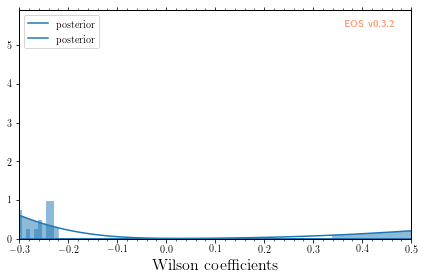

In [54]:
plot_args = {
    'plot': {
        'x': { 'label': r'Wilson coefficients', 'range': [-0.3, 0.5] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'type': 'histogram',
            'data': { 'samples': parameter_samples[:, 0]}
        },
        {
            'type': 'histogram',
            'data': { 'samples': parameter_samples[:, 1]}
        },
        {
            'type': 'kde', 'color': 'C0', 'label': 'posterior', 'bandwidth': 2,
            'range': [-1, 1],
            'data': { 'samples': parameter_samples[:, 0]}
        },
        {
            'type': 'kde', 'color': 'C0', 'label': 'posterior', 'bandwidth': 2,
            'range': [-1, 1],
            'data': { 'samples': parameter_samples[:, 1] }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

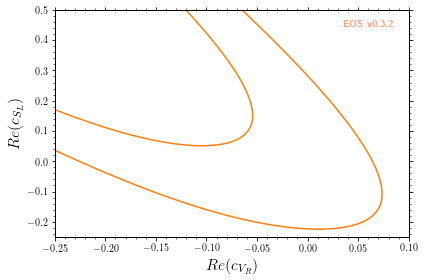

In [55]:
plot_args = {
    'plot': {
        'x': { 'label': r'$Re(c_{V_R})$', 'range': [-0.25, 0.1] },
        'y': { 'label': r'$Re(c_{S_L})$',   'range': [-0.25, 0.5] },
    },
    'contents': [
        {
            'type': 'kde2D', 'color': 'C1', 'label': 'posterior',
            'range': [-1, 1], 'levels': [68, 95], 'bandwidth': 3,
            'data': { 'samples': parameter_samples[:, (0,1)] }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

In [56]:
print('Re(cVR) = {mean:.4f} +/- {std:.4f}'.format(
    mean=np.average(parameter_samples[:,0]),
    std=np.std(parameter_samples[:, 0])
))

print('Re(cSL) = {mean:.4f} +/- {std:.4f}'.format(
    mean=np.average(parameter_samples[:,1]),
    std=np.std(parameter_samples[:, 1])
))

Re(cVR) = -0.6165 +/- 0.1712
Re(cSL) = 1.2987 +/- 0.3830
